In [1]:
# importing modules and initialising the interactive mode

from IPython import get_ipython

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('matplotlib', 'notebook')
plt.ion()

In [2]:
def RMS_error(A,B,margin=1):
    TEMP = np.zeros((len(A[:,0]),len(A[0,:])))
    BIG_ERROR = np.zeros((len(A[:,0]),len(A[0,:])))
    TEMP = (A - B)**2
    get_ipython().run_line_magic('matplotlib', 'notebook')
    fig = plt.hist(np.sqrt(TEMP).flatten())
    stdev = np.sqrt(np.sum(TEMP)/(len(A[:,0])*len(A[0,:])))
    
    for i in range(len(A[:,0])):
        for j in range(len(A[0,:])):
            if np.sqrt(TEMP[i,j])>=stdev*margin:
                BIG_ERROR[i,j] = 1
    return stdev, BIG_ERROR

def abs_error(A,B,margin=1):
    TEMP = np.zeros((len(A[:,0]),len(A[0:,])))
    BIG_ERROR = np.zeros((len(A[:,0]),len(A[0,:])))
    TEMP = np.abs(A - B)
    get_ipython().run_line_magic('matplotlib', 'notebook')
    fig = plt.hist(np.sqrt(TEMP).flatten())
    abserror = np.sum(TEMP)/(len(A[:,0])*len(A[0,:]))
    
    for i in range(len(A[:,0])):
        for j in range(len(A[0,:])):
            if np.sqrt(TEMP[i,j])>= abserror * margin:
                BIG_ERROR[i,j] = 1
    return abserror, BIG_ERROR

<IPython.core.display.Javascript object>


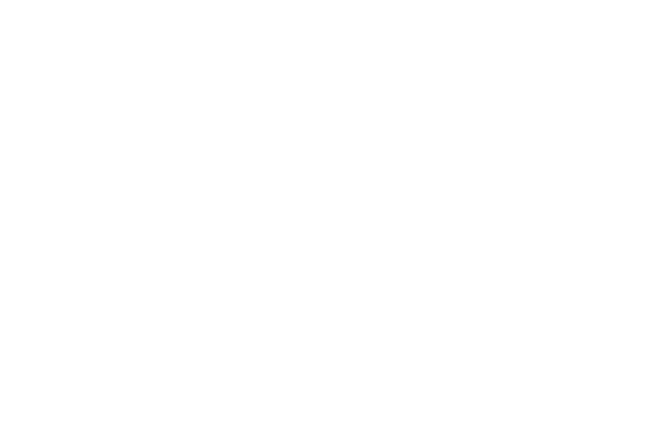

In [3]:
# uploading data and plotting the numerical solution for q2
fname = "../CSV_files/Q2.csv"

Data = np.loadtxt(fname, delimiter=';')


X = np.array([[i for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])

Y = np.array([[j for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])

get_ipython().run_line_magic('matplotlib', 'notebook')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y , Data)

<IPython.core.display.Javascript object>


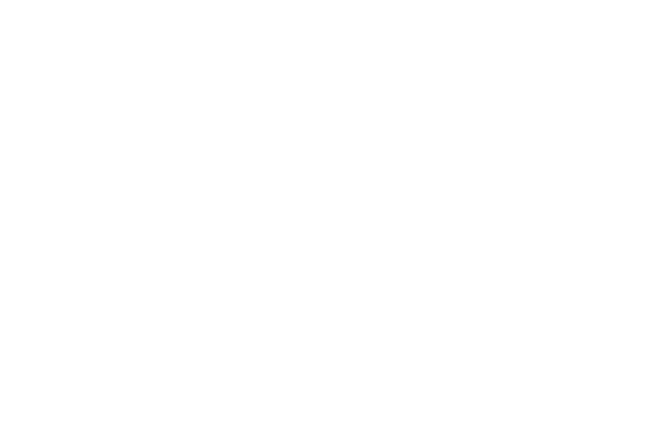

0.836063317596


In [4]:
def analq2(V, x_min, x_max, r, centre_x, centre_y, x, y):
    """
    Analytical solution to the 2nd question
    
    V - potential
    x_min - position of first plate
    x_max - position of second plate
    r - radius of circle
    centre_x, centre_y - coordinates of the centre of the circle
    x,y - coordinates of the point to be evaluated
    """
    dist = np.sqrt((centre_x-x)**2+(centre_y-y)**2)
    if x<=x_min:
        V_out = 20
    elif x>=x_max:
        V_out = -20
    elif dist<=r:
        V_out = 0
    else:
        cosine = (x-centre_x)/dist
        V_out = -(2*V/(x_max-x_min))*(dist-(r**3)/dist**2)*cosine
    return V_out

def analq2_1(V, x_min, x_max, r, centre_x, centre_y, x, y):
    """
    2nd version of the analytical solution to the 2nd question, we changed the powers in the formula
    
    V - potential
    x_min - position of first plate
    x_max - position of second plate
    r - radius of circle
    centre_x, centre_y - coordinates of the centre of the circle
    x,y - coordinates of the point to be evaluated
    """
    dist = np.sqrt((centre_x-x)**2+(centre_y-y)**2)
    if x<=x_min:
        V_out = 20
    elif x>=x_max:
        V_out = -20
    elif dist<=r:
        V_out = 0
    else:
        cosine = (x-centre_x)/dist
        V_out = -(2*V/(x_max-x_min))*(dist-(r**2)/dist)*cosine
    return V_out

Analsol_1 = np.zeros((len(Data[:,0]),len(Data[0,:])))
for i in range(len(Data[:,0])):
    for j in range(len(Data[0,:])):    
        Analsol_1[i][j] = analq2(20,0,len(Data[0])-1,10,250,250,X[i][j],Y[i][j])

Analsol_2 = np.zeros((len(Data[:,0]),len(Data[0,:])))
for i in range(len(Data[:,0])):
    for j in range(len(Data[0,:])):    
        Analsol_2[i][j] = analq2_1(20,25,75,10,50,50,X[i][j],Y[i][j])

stdev, big_error = RMS_error(Data,Analsol_2)
print(stdev)

<IPython.core.display.Javascript object>


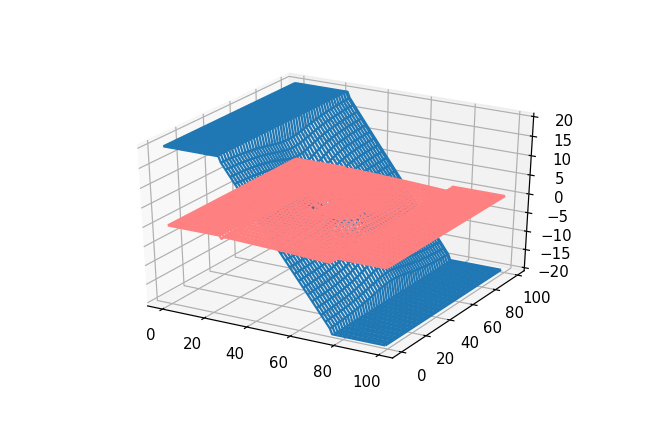

In [5]:
ERR_X = []
ERR_Y = []
ERR_Z = []
for i in range(len(Data[:,0])):
        for j in range(len(Data[0,:])):
            if big_error[i,j]:
                ERR_X.append(X[i,j])
                ERR_Y.append(Y[i,j])
                ERR_Z.append(Data[i,j])

get_ipython().run_line_magic('matplotlib', 'notebook')
fig2 = plt.figure()
ax1 = fig2.add_subplot(111, projection='3d')
if False:
    ax1.plot_wireframe(X[200:300,200:300], Y[200:300,200:300], Analsol_1[200:300,200:300], colors=[(0,1,0,1)])
    ax1.plot_wireframe(X[200:300,200:300], Y[200:300,200:300] , Data[200:300,200:300])
    ax1.plot_wireframe(X[200:300,200:300], Y[200:300,200:300],np.array(Data-Analsol_1)[200:300,200:300],colors=[(1,0.5,0.5,1)])
elif 0:
    ax1.plot_wireframe(X, Y, Analsol_1, colors=[(0,1,0,1)])
    ax1.plot_wireframe(X, Y, Data)
    ax1.plot_wireframe(X, Y,np.array(Data-Analsol_1),colors=[(1,0.5,0.5,1)])
elif 1:
    #ax1.plot_wireframe(X, Y, Analsol_2, colors=[(0,1,0,1)])
    ax1.plot_wireframe(X, Y, Analsol_2)
    ax1.plot_wireframe(X, Y,np.array(Data-Analsol_2),colors=[(1,0.5,0.5,1)])
elif 0:
    ax1.scatter(ERR_X, ERR_Y, ERR_Z, c=(1,0,0))
    ax1.plot_wireframe(X, Y,np.array(Data-Analsol_1),colors=[(1,0.5,0.5,1)])

In [6]:
Diff = Data - Analsol_2
big = max(np.abs(Diff.max()),np.abs(Diff.min()))
norm = Normalize(vmin=-big,vmax=big)
plt.scatter(X,Y,c=Diff,cmap="bwr",norm=norm)
plt.colorbar()
plt.show()

ValueError: c of shape (100, 100) not acceptable as a color sequence for x with size 10000, y with size 10000